<H3>Trabalho Prático 1 - Algoritmos 2 2024.1 UFMG</H3>
Membros:

* Gabriel Arcanjo Campelo Fadoul - 2021031645

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from TriangProntaAlterada import *

<H4> Carga das instâncias de testes

In [2]:
texto = '20 1/1 1/1 34/1 1/1 34/1 -29/4 445/16 -29/4 445/16 -31/2 34/1 -31/2 34/1 -95/4 67/1 -95/4 67/1 1/1 100/1 1/1 100/1 34/1 499/4 34/1 499/4 67/1 100/1 67/1 100/1 100/1 1/1 100/1 1/1 67/1 -95/4 67/1 -95/4 34/1 1/1 34/1'
lista = texto.split()
lista = lista[1:]
lista2 = []
for elem in lista:
    if '/' in elem:
        numerador, denominador = map(float, elem.split('/'))
        resultado = numerador / denominador
        lista2.append(resultado)
    else:
        elem2 = float(elem)
        lista2.append(elem2)

lista = lista2
pontos = []
for i in range(0, len(lista) - 1, 2):
  tupla = Vertice(lista[i], lista[i + 1])
  pontos.append(tupla)
G = Grafo()
for v in pontos:
    G.adicionar_vertice(v)
arestas = []

tamanho = len(pontos) - 1
for i in range(tamanho):
    ar = Aresta(pontos[i], pontos[i + 1])
    arestas.append(ar)

ar = Aresta(pontos[tamanho], pontos[0])
arestas.append(ar)

for aresta in arestas:
    G.adicionar_aresta(aresta)
vertices = G.vertices

In [3]:
#df = px.data.gapminder()
v = list(map(lambda P: (P.x,P.y),vertices))

fig = px.line(x=np.array(v)[:,0],y=np.array(v)[:,1],markers=True)
fig.update_traces(marker_size=10)
fig.show()

<H4>Funções Primitivas de Geometria Computacional

<H4>Funções de Triangulação

<H4>Animações

In [4]:
#df = px.data.gapminder()
v = list(map(lambda P: (P.x,P.y),G.vertices))

fig = px.line(x=np.array(v)[:,0],y=np.array(v)[:,1],markers=True)
fig.update_traces(marker_size=10)
#fig.update_traces(marker=dict(size=100,
#                              line=dict(width=2,
#                                        color='DarkSlateGrey')),
#                  selector=dict(mode='markers'))
fig.show()

In [5]:
verticesAnimacao = list(G.vertices)
verticesAnimacao.append(vertices[0])
v2 = list(map(lambda P: (P.x,P.y), verticesAnimacao))
polygon_stages = []
polygon_stages.append(v2)
years = []
(G, triangulos, polygon_stages2, years2) = triangulacao(G, polygon_stages, years)
x_v, y_v = zip(*v)
x_v = list(x_v)
y_v = list(y_v)
xMin = min(x_v) - 7
yMin = min(y_v) - 7
xMax = max(x_v) + 7
yMax = max(y_v) + 7
#plot_custom_polygon(G.graph, G.vertices, G.arestas)

In [6]:

# Define as coordenadas do polígono em diferentes estágios
polygon_stages = polygon_stages2

# Definir os anos como estágios do polígono para a animação
years = years2

# Criação da estrutura da figura
fig_dict = {
    "data": [],
    "layout": {},
    "frames": []
}

# Configuração do layout
fig_dict["layout"]["xaxis"] = {"range": [xMin, xMax], "title": "X"}
fig_dict["layout"]["yaxis"] = {"range": [yMin, yMax], "title": "Y"}
fig_dict["layout"]["hovermode"] = "closest"
fig_dict["layout"]["updatemenus"] = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 500, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 300,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]

sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Stage:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

# Configuração inicial do polígono
initial_polygon = polygon_stages[0]
x, y = zip(*initial_polygon)
data_dict = {
    "x": x,
    "y": y,
    "mode": "lines+markers",
    "name": "Polygon",
    "line": {"shape": "linear"}
}
fig_dict["data"].append(data_dict)

# Criação dos frames para cada estágio do polígono
for i, year in enumerate(years):
    frame = {"data": [], "name": str(year)}
    polygon = polygon_stages[i]
    x, y = zip(*polygon)
    data_dict = {
        "x": x,
        "y": y,
        "mode": "lines+markers",
        "name": "Polygon",
        "line": {"shape": "linear"}
    }
    frame["data"].append(data_dict)
    fig_dict["frames"].append(frame)

    slider_step = {
        "args": [
            [year],
            {"frame": {"duration": 300, "redraw": False},
             "mode": "immediate",
             "transition": {"duration": 300}}
        ],
        "label": year,
        "method": "animate"
    }
    sliders_dict["steps"].append(slider_step)

fig_dict["layout"]["sliders"] = [sliders_dict]

fig = go.Figure(fig_dict)

fig.show()


In [7]:
def color_triangle(graph, triangulos, i):
    colors = [0, 1, 2]
    if i == 0:
        p1,p2,p3 = triangulos[i]
        graph.nodes[p1]['color'] = colors[0]
        graph.nodes[p2]['color'] = colors[1]
        graph.nodes[p3]['color'] = colors[2]
        return graph

    ja_coloridos = dict()
    point = 0
    for p in triangulos[i]:
        if graph.nodes[p]['color'] != None:
            ja_coloridos[p] = graph.nodes[p]['color']
        else:
            point = p    
            
    to_color = list((set(colors) - (set(ja_coloridos.values()) & set(colors))))[0]
    graph.nodes[point]['color'] = to_color
    
    return graph



In [8]:
colored_Graph = G.graph.copy()

dual = nx.Graph()
for i in range(len(triangulos)):
    tri_v = '-'.join(np.array(triangulos[i],dtype=str))
    dual.add_node(i,tri_v = tri_v)

for i in range(len(triangulos)):
    for j in range(len(triangulos)):
        if(len(set(triangulos[i]+triangulos[j]))) == 4:
            dual.add_edge(i,j)

dfs_edges = list(nx.dfs_edges(dual))
colored_Graph = color_triangle(colored_Graph,triangulos,0)
for i,j in dfs_edges:
    colored_Graph = color_triangle(colored_Graph,triangulos,j)

In [9]:
colors  = list(nx.get_node_attributes(colored_Graph,'color').values())

In [10]:
def plot_custom_polygon_2(G, vertices, arestas, coloracao):
    fig, ax = plt.subplots()
    # Pega as posições dos nós
    pos = nx.get_node_attributes(G, 'pos')

    # Define um mapa de cores para as 3 cores
    cores = ['cyan', 'magenta', 'yellow']  # Pode ajustar as cores conforme necessário

    # Desenha o grafo com as cores especificadas na coloração
    node_colors = [cores[coloracao[i]] for i in range(len(vertices))]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='r', node_size=500, font_size=12, font_color='black')

    # Desenha apenas os segmentos de arestas definidos
    for ar in arestas:
        x_values = [ar.pInicio.x, ar.pFinal.x]
        y_values = [ar.pInicio.y, ar.pFinal.y]
        ax.plot(x_values, y_values, 'r-')

    # Ajusta os limites do gráfico
    ax.set_xlim(min(v.x for v in vertices) - 1, max(v.x for v in vertices) + 1)
    ax.set_ylim(min(v.y for v in vertices) - 1, max(v.y for v in vertices) + 1)
    ax.set_aspect('equal')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Custom Polygon')
    plt.grid(True)

    plt.show()

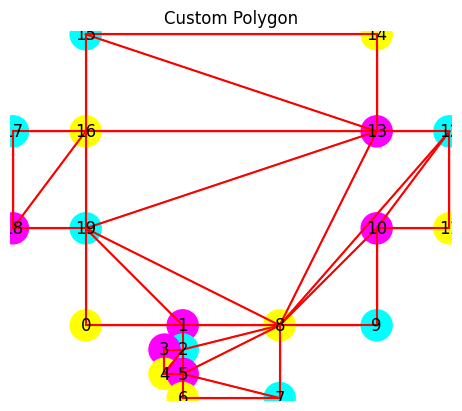

In [11]:
plot_custom_polygon_2(colored_Graph, G.vertices, G.arestas, colors)